In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [2]:
# Load data from https://www.openml.org/d/554
print('Loading data...')  # Now let's load the data

from sklearn.datasets import fetch_openml    # this is another great online source of data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)   # we will load the digits dataset
print('Done')

Loading data...


/home/apwood/venv/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Done


In [3]:
# The dataset should consist of 70000 rows and 784 columns. 
# Each column contains the pixel intensities of one 28 x 28 (784) image 
# Each image is of a handwritten digit: 0,1, ..., 9

# Let's check the dataset size
print('Shape of X:', X.shape, '\n', 'Shape of y:', y.shape)
X.describe()

Shape of X: (70000, 784) 
 Shape of y: (70000,)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


'7'

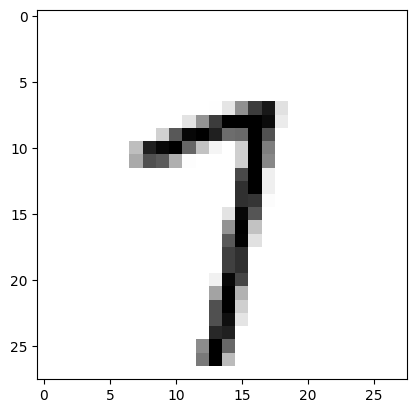

In [4]:
# Let's see what one image looks like 
digit = X.iloc[42]  
digit_pixels = np.array(digit).reshape(28, 28)  # from 784 vector to 28 x 28 image
plt.imshow(digit_pixels, cmap=plt.cm.binary)
y[42]  # check that the label corresponds to the image

In [5]:
# train on first 60K rows, test on all the rows after that
X_train, X_test = X[:60000], X[60000:]  
y_train, y_test = y[:60000], y[60000:]  
print('Done')

Done


In [6]:
# rescale the data
X_train = X_train / 255.
print('Done')

Done


In [7]:
# Design the classifier neural network
mlp = MLPClassifier(hidden_layer_sizes=(8,), # one hidden layer with 50 neurons
                    activation = 'relu',  # ReLU is the default option
                    # solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init=.1 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=10,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )

# Train the classifier
# NOTE: this example won't converge because our max_iter choice is too few epochs 
# (otherwise it will take too long for a live demo), 
# so we catch the warning and ignore it here
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

InvalidParameterError: The 'activation' parameter of MLPClassifier must be a str among {'tanh', 'logistic', 'relu', 'identity'}. Got ['relu', 'logistic'] instead.

In [8]:
X_test = X_test / 255.    # rescale the test data using the same scaler as for the training set

y_predicted = mlp.predict(X_test)   # use the trained classifier to predict on the test set

print('\n clasification report:\n', classification_report(y_test, y_predicted))  # compare predictions with ground truth
print('Done')


 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.96      0.92      0.94      1135
           2       0.94      0.82      0.88      1032
           3       0.78      0.85      0.81      1010
           4       0.72      0.91      0.81       982
           5       0.67      0.70      0.68       892
           6       0.81      0.93      0.87       958
           7       0.88      0.82      0.85      1028
           8       0.77      0.70      0.73       974
           9       0.77      0.62      0.69      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

Done
